In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick

#display all columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.5 MB/s eta 0:00:00


In [3]:
# Clone the azubia africa githup rep
!git clone https://github.com/Azubi-Africa/Career_Accelerator_LP3-Classifcation.git

Cloning into 'Career_Accelerator_LP3-Classifcation'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 29 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), 345.28 KiB | 2.85 MiB/s, done.


In [4]:
from shutil import unpack_archive

In [5]:
data = pd.read_csv('/content/Career_Accelerator_LP3-Classifcation/Telco-Customer-Churn.zip')

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
# Checking the data types of all the columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Based on the above output, we can conclude that there are 11 missing values for the Total Charges variable. Therefore, we will eliminate these 11 rows from our dataset**

In [11]:
#Removing missing values 
data.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = data.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


<Axes: >

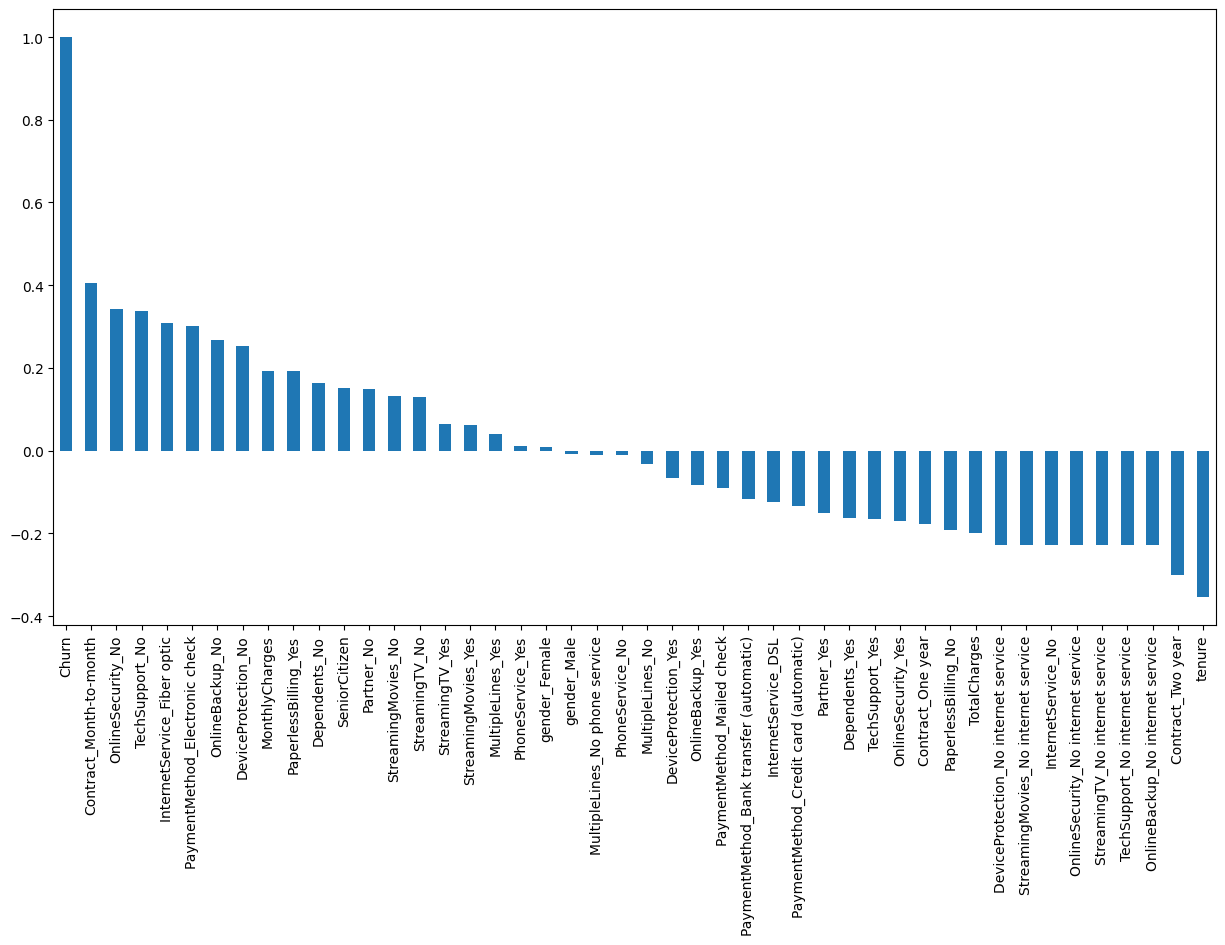

In [12]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

We have observed a positive correlation between churn and variables such as month-to-month contracts and absence of online security and tech support. On the other hand, we found a negative correlation between churn and variables such as tenure and two-year contracts.

Surprisingly, we noticed a negative relationship between churn and certain services such as online security, streaming TV, online backup, tech support, etc. that do not require an internet connection.

In the following sections, we will investigate these correlation patterns further before proceeding to model and identify significant variables.

**Quick Data Exploration**

To gain a better understanding of the data and potentially formulate some hypotheses, we will begin by exploring our dataset. Our first step will be to examine the distribution of individual variables, followed by slicing and analyzing the data for any noteworthy trends.

**A.)** **Demographics** - Let us first understand the gender, age range, patner and dependent status of the customers

**1.** **Gender Distribution** - About half of the customers in our data set are male while the other half are female

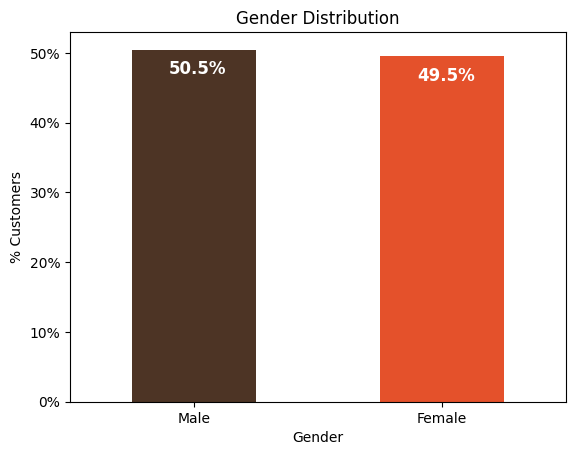

In [13]:
colors = ['#4D3425','#E4512B']
ax = (data['gender'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**1.** **%Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

Text(0.5, 1.0, '% of Senior Citizens')

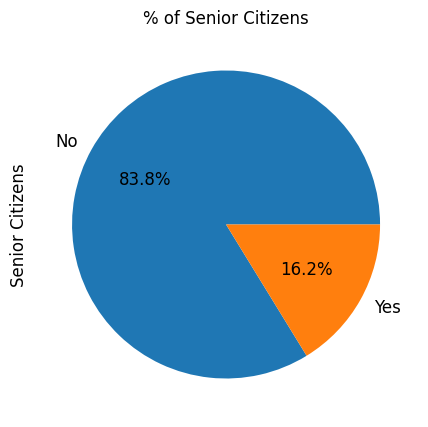

In [14]:
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

**1.** **Partner and dependent status** - About 50% of the customers have a partner, while only 30% of the total customers have dependents.

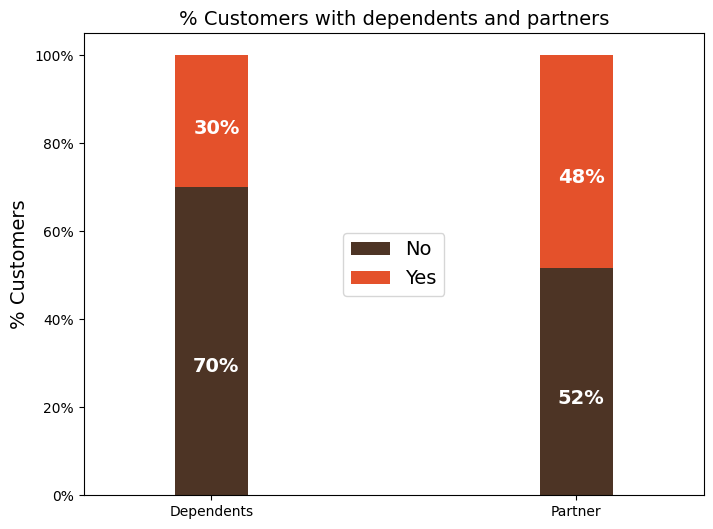

In [15]:
df2 = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(data)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next.**

It is worth noting that among customers who have a partner, only around 50% also have dependents, while the other half do not have any dependents. As expected, among customers without a partner, the majority (80%) do not have any dependents.

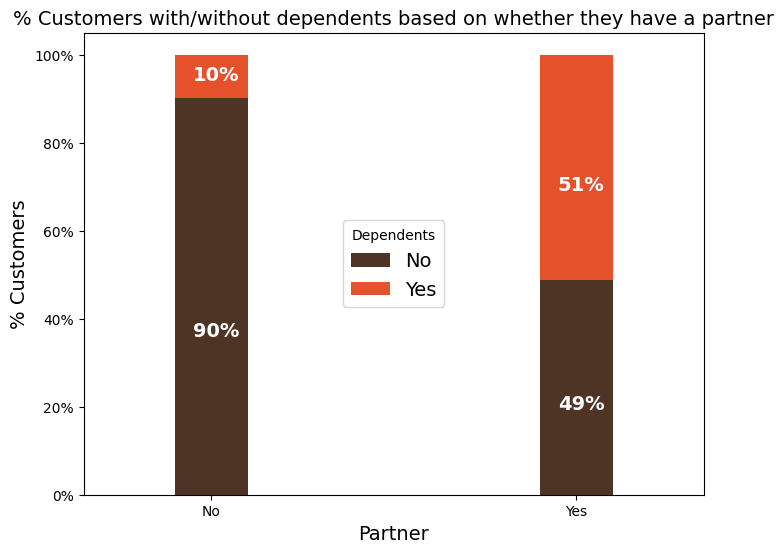

In [16]:
colors = ['#4D3425','#E4512B']
partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

I also examined whether there were any variations by gender in the percentage of customers with or without partners and dependents. However, there were no differences in their distribution based on gender. Furthermore, there were no differences in senior citizen status based on gender.

**B.)** **Customer Account Information:** Let u now look at the tenure, contract

**1.** **Tenure:**

Upon examining the histogram below, it is evident that many customers have only been with the telecom company for a month, while a significant number have been with the company for approximately 72 months. This trend may be attributed to the fact that customers have different contracts, which may make it easier or harder for them to continue or discontinue doing business with the telecom company.

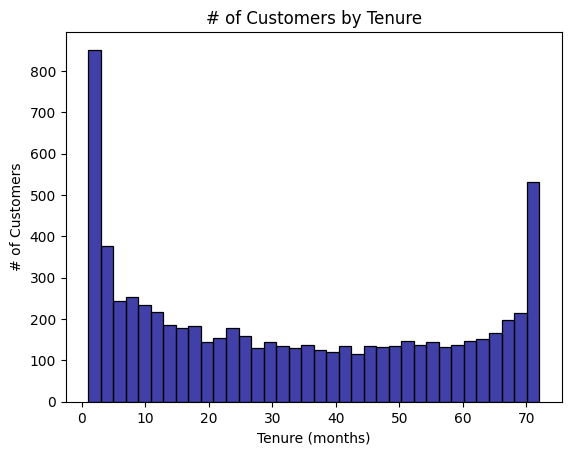

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['tenure'], bins=int(180/5), color='darkblue', edgecolor='black')
plt.ylabel('# of Customers')
plt.xlabel('Tenure (months)')
plt.title('# of Customers by Tenure')
plt.show()

**2.** **Contracts:** To understand the above graph, lets first look at the # of customers by different contracts.

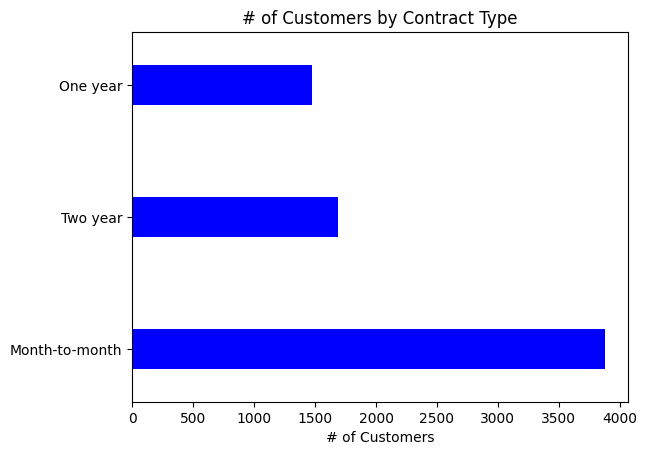

In [18]:
ax = data['Contract'].value_counts().plot(kind='barh', width=0.3, color='b')
ax.set_xlabel('# of Customers')
ax.set_title('# of Customers by Contract Type')
plt.show()

he bar chart below shows the distribution of customers across different contract types. The majority of customers are subscribed to the month-to-month plan, while roughly the same number of customers are in the one-year and two-year contract plans.

We will now investigate the relationship between a customer's tenure and their contract type.

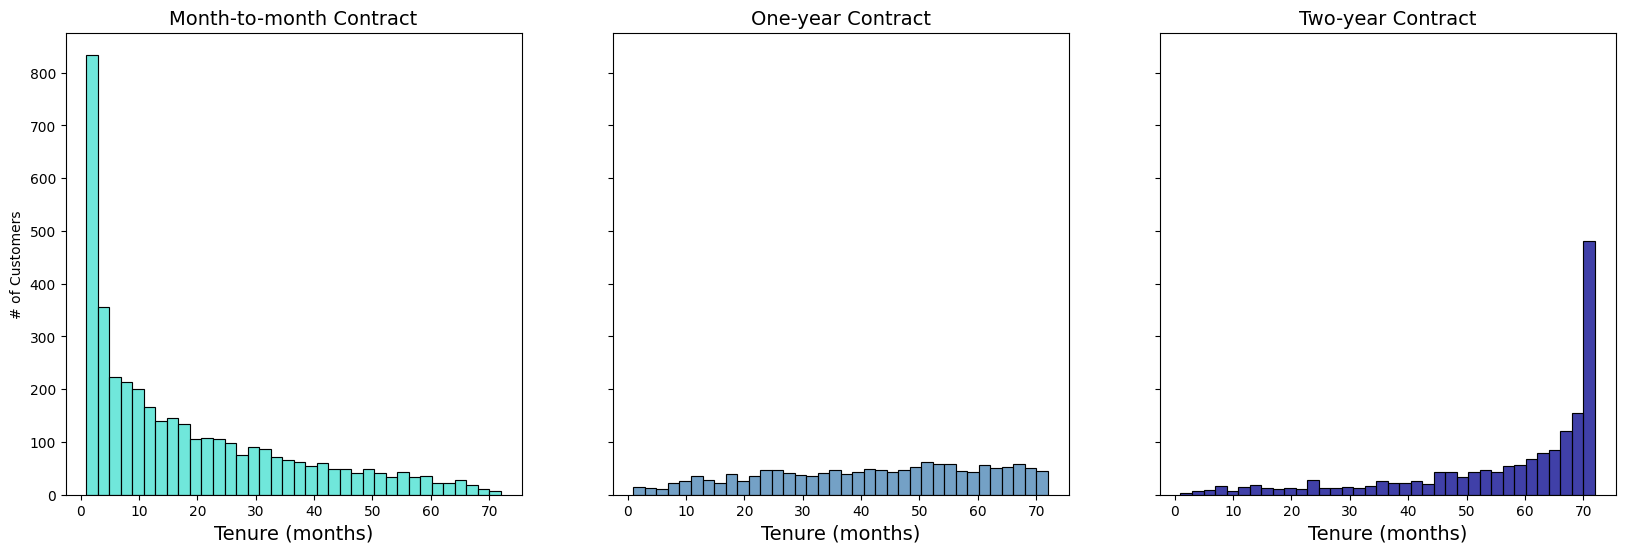

In [19]:
# create a figure with 3 subplots sharing the y-axis
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# create a histogram of the 'tenure' column for the month-to-month contract group
sns.histplot(data[data['Contract'] == 'Month-to-month']['tenure'],
             bins=int(180/5), color='turquoise', edgecolor='black',
             ax=ax1)
ax1.set_title('Month-to-month Contract', fontsize=14)
ax1.set_xlabel('Tenure (months)', fontsize=14)
ax1.set_ylabel('# of Customers')

# create a histogram of the 'tenure' column for the one-year contract group
sns.histplot(data[data['Contract'] == 'One year']['tenure'],
             bins=int(180/5), color='steelblue', edgecolor='black',
             ax=ax2)
ax2.set_title('One-year Contract', fontsize=14)
ax2.set_xlabel('Tenure (months)', fontsize=14)

# create a histogram of the 'tenure' column for the two-year contract group
sns.histplot(data[data['Contract'] == 'Two year']['tenure'],
             bins=int(180/5), color='darkblue', edgecolor='black',
             ax=ax3)
ax3.set_title('Two-year Contract', fontsize=14)
ax3.set_xlabel('Tenure (months)', fontsize=14)

plt.show()

It's worth noting that most of the month-to-month contracts have a duration of only 1-2 months, while the two-year contracts typically last around 70 months. This suggests that customers who commit to a longer contract duration are more loyal and tend to stay with the company for an extended period.

These insights align with what we observed in the previous chart that showed a correlation between contract duration and churn rate.

**C.** Let us now look at the distribution of various services used by customers

In [20]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

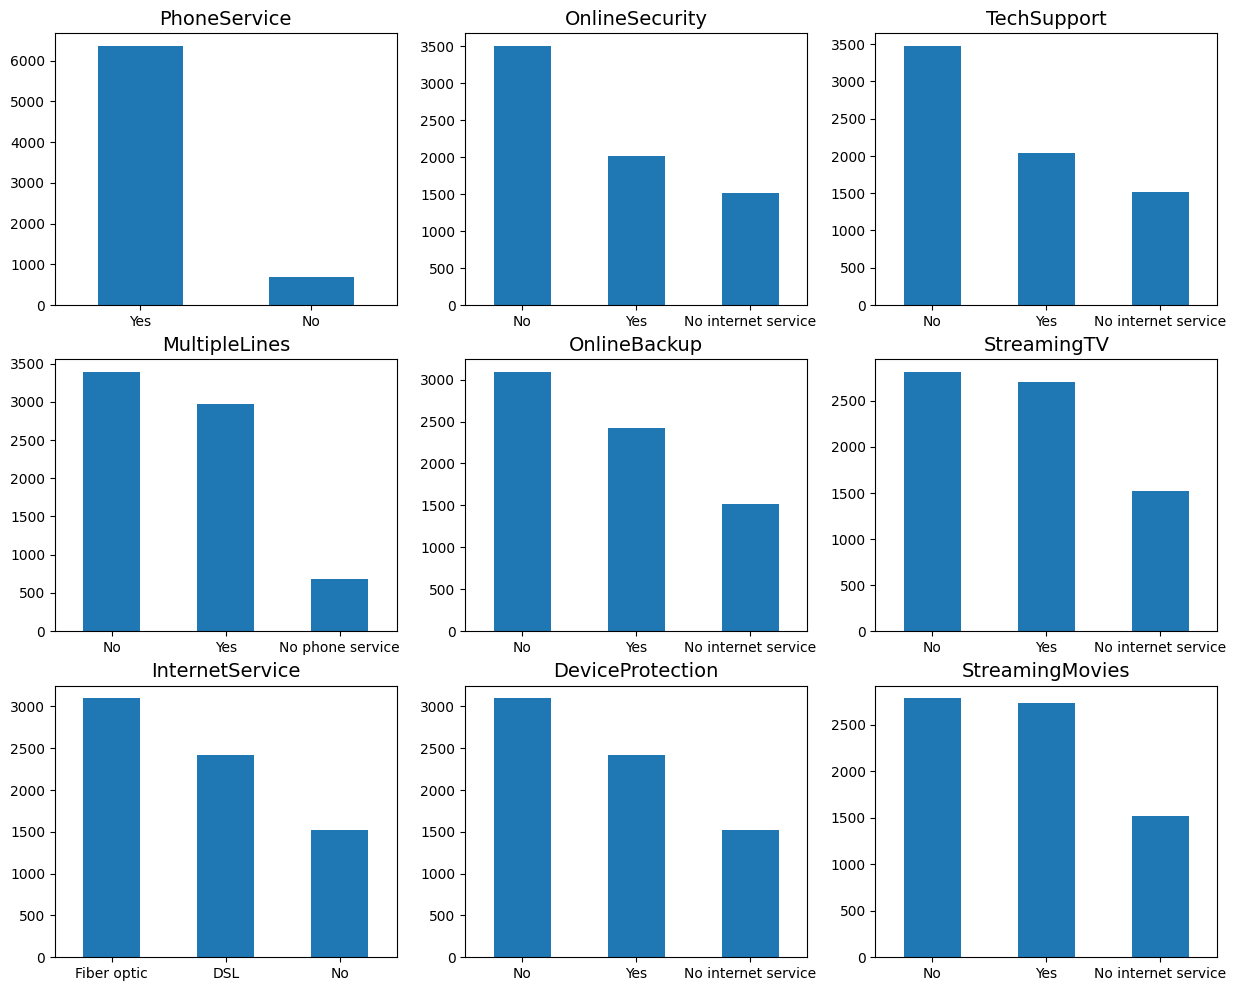

In [21]:
# create a list of categorical variables
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# create a 3x3 figure of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# create a vertical bar chart for each service and place it in the corresponding subplot
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0)
        
    elif i >= 3 and i < 6:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i-3, 1], rot=0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i-6, 2], rot=0)
        
    ax.set_title(item, fontsize=14)

plt.show()

**D.) Now let's take a quick look at the relation between monthly and total charges**

We will observe that the total charges increases as the monthly bill for a customer increases.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

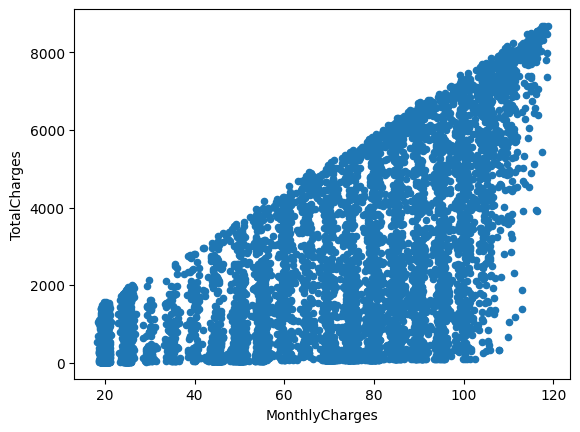

In [22]:
data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

**E.)** Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.

1. Lets first look at the churn rate in our data

In [23]:
# create text with specified font size
ax.text(x, y, text, fontsize=12)

TypeError: ignored

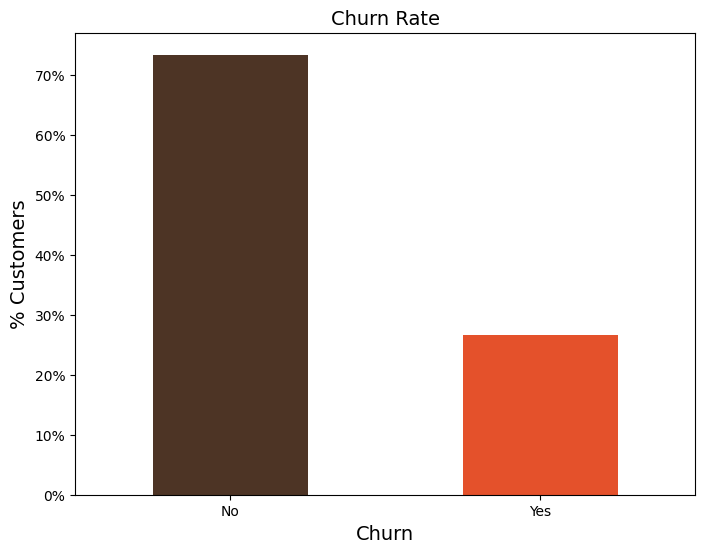

In [26]:
# define the colors for the stacked bar chart
colors = ['#4D3425','#E4512B']

# create a stacked bar chart of the 'Churn' column
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked=True, rot=0, color=colors, figsize=(8, 6))

# format the y-axis as a percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# add labels to the y-axis, x-axis, and title of the chart
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# create a list to collect the plt.patches data
totals = []

# find the values and append them to the list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using the above list
total = sum(totals)
for i in ax.patches:
    percentage = str(round((i.get_height() / total) * 100, 1)) + '%'
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0, percentage,
            fontsize=12, color='white', weight='bold', size=14)

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

i.) Churn vs Tenure: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

<Axes: xlabel='Churn', ylabel='tenure'>

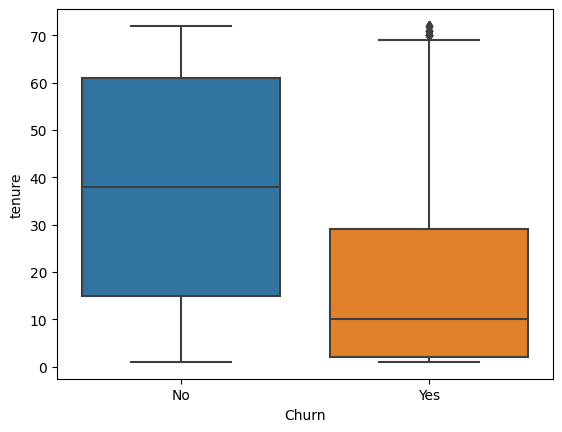

In [27]:
sns.boxplot(x = data.Churn, y = data.tenure)

ii.) Churn by Contract Type: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

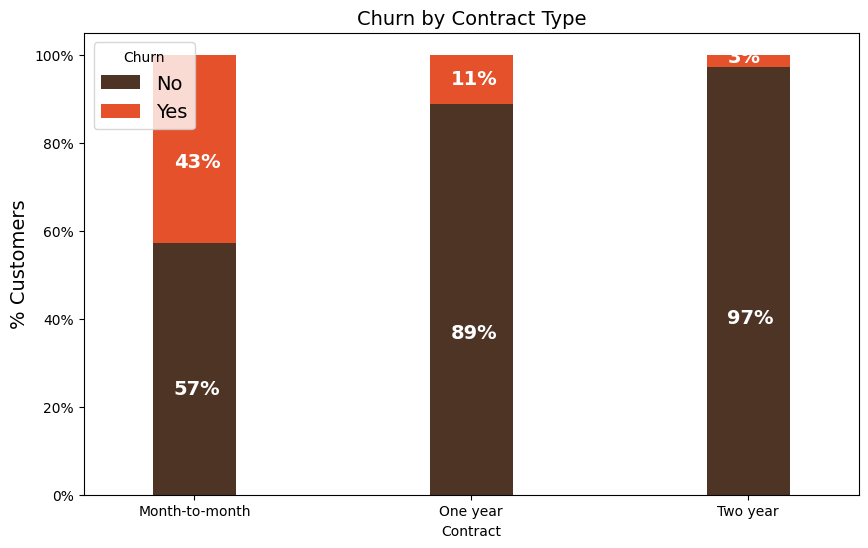

In [28]:
colors = ['#4D3425','#E4512B']
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

iii.) Churn by Seniority: Senior Citizens have almost double the churn rate than younger population.

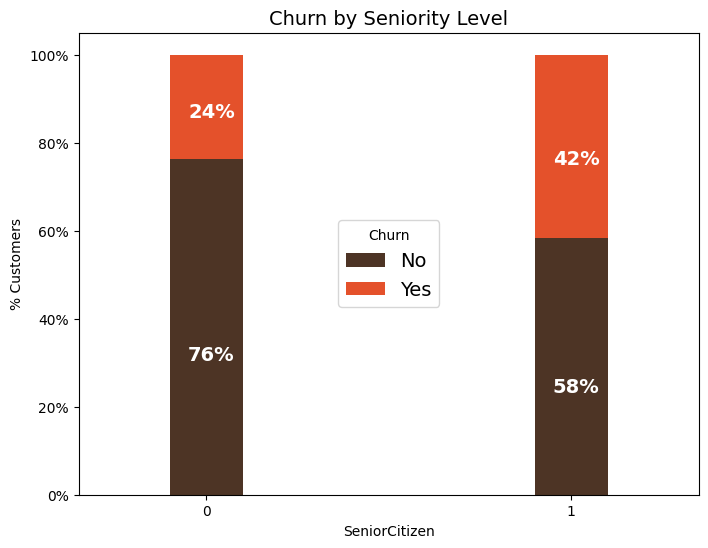

In [29]:
colors = ['#4D3425','#E4512B']
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

iv.) Churn by Monthly Charges: Higher % of customers churn when the monthly charges are high.

<ipython-input-30-113946f5ec23>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
<ipython-input-30-113946f5ec23>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

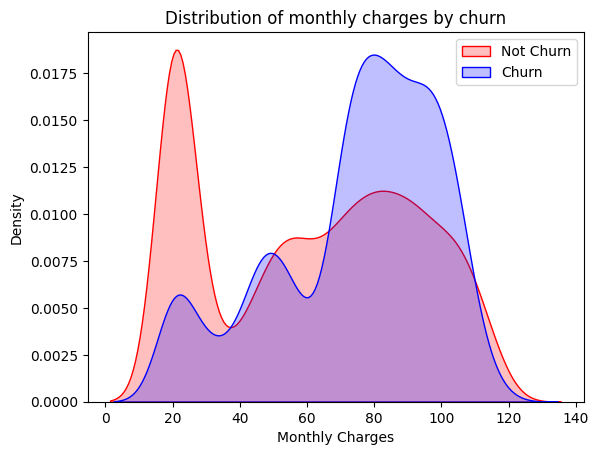

In [30]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

v.) Churn by Total Charges: It seems that there is higer churn when the total charges are lower.

<ipython-input-31-0be6c1e3ac46>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
<ipython-input-31-0be6c1e3ac46>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of total charges by churn')

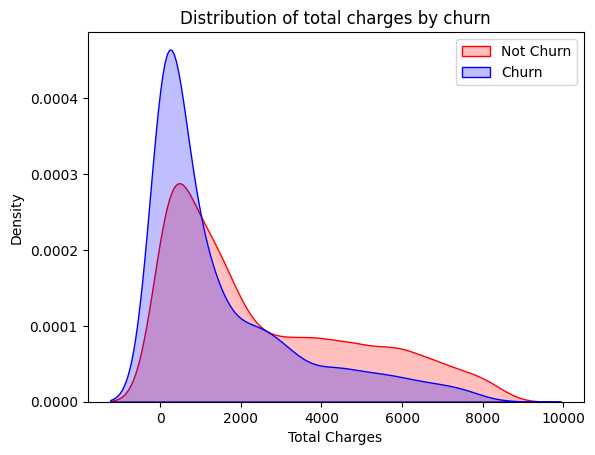

In [31]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

**After going through the above EDA we will develop some predictive models and compare them.**

We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

**1. Logistic Regression**

In [32]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

It is important to scale the variables in logistic regression so that all of them are within a range of 0 to 1. This helped me improve the accuracy from 79.7% to 80.7%. Further, you will notice below that the importance of variables is also aligned with what we are seeing in Random Forest algorithm and the EDA we conducted above.

In [33]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [35]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


Axes(0.125,0.11;0.775x0.77)


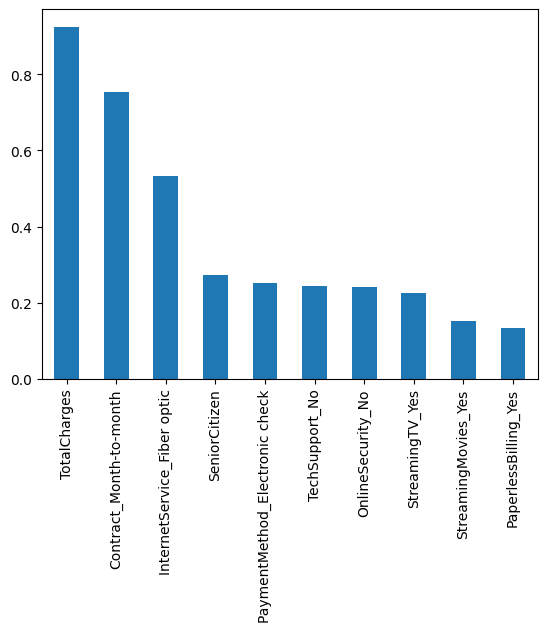

In [37]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


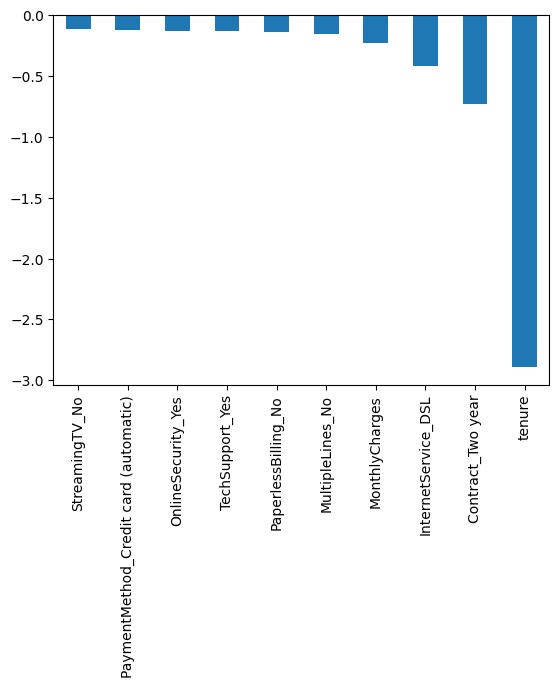

In [38]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

Observations

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.
Any hypothesis on the above would be really helpful!

**2. Random Forest(Final Model)**

In [49]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

model_rf.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(model_rf, 'trained_model.joblib')

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8088130774697939


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


['trained_model.joblib']

<Axes: >

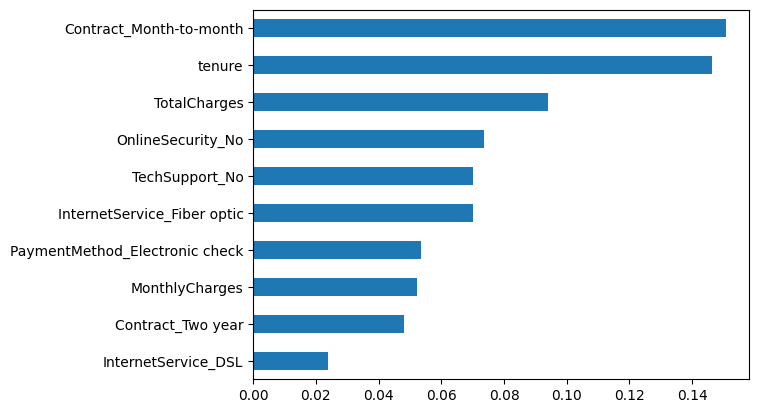

In [40]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

**Observations:**

From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

**3. Support Vecor Machine (SVM)**

In [41]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [42]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [43]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[953  89]
 [164 201]]


Wth SVM I was able to increase the accuracy to upto 82%. However, we need to take a deeper look at the true positive and true negative rates, including the Area Under the Curve (AUC) for a better prediction. I will explore this soon. Stay Tuned!

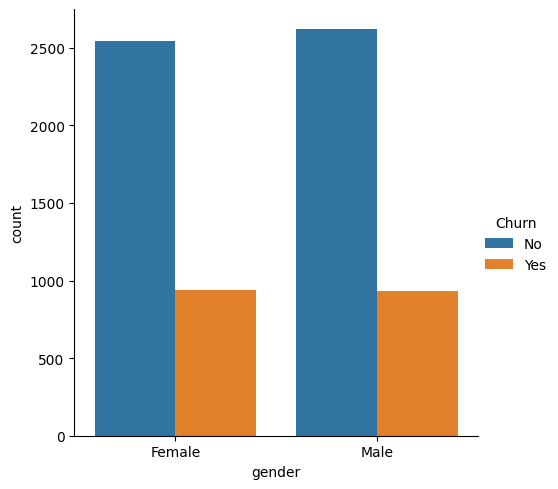

In [44]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=data,
                  estimator=lambda x: sum(x==0)*100.0/len(x))
#ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

**4. ADA Boost**

In [45]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8159203980099502

**5. XG Boost**

In [46]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8095238095238095

In [25]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 15.7 MB/s eta 0:00:00
  Preparing meta

In [47]:
import gradio as gr
import joblib
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = joblib.load('trained_model.joblib')

In [51]:
# Train the model
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(model_rf, 'trained_model.joblib')

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


['trained_model.joblib']

In [52]:
inputs = [
          gr.inputs.Number(label="Customer Tenure (months)"), 
          gr.inputs.Number(label="Monthly Charges"), 
          gr.inputs.Number(label="Total Charges")
]

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [53]:
output = gr.outputs.Label(label="Churn Prediction (0=No, 1=Yes)")


/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [54]:
def predict_churn(tenure, monthly_charges, total_charges):
    # create a numpy array with the input values
    input_data = np.array([[tenure, monthly_charges, total_charges]])

    # make a prediction using the model
    prediction = model.predict(input_data)[0]

    # return the prediction
    return "No" if prediction == 0 else "Yes"


In [78]:
!pip install gradio --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import gradio as gr
import numpy as np
import joblib

# Load the trained model
model = joblib.load("trained_model.joblib")

# Define the input and output interfaces
inputs = [
    gr.inputs.Number(label="Customer Tenure (months)", default=12),
    gr.inputs.Number(label="Monthly Charges", default=50),
    gr.inputs.Number(label="Total Charges", default=600)
]

output = gr.outputs.Label(label="Churn Prediction (0=No, 1=Yes)")

# Define the prediction function
def predict_churn(tenure, monthly_charges, total_charges):
    # create a numpy array with the input values
    input_data = np.array([[tenure, monthly_charges, total_charges]])

    # make a prediction using the model
    prediction = model.predict(input_data)[0]

    # return the prediction
    return "No" if prediction == 0 else "Yes"

# Create the Gradio interface
interface = gr.Interface(fn=predict_churn, inputs=inputs, outputs=output)

# Launch the interface
interface.launch()

/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [97]:
import gradio as gr
import numpy as np
import joblib

# Load the trained model
model = joblib.load("trained_model.joblib")

# Define the input interface
tenure_input = gr.inputs.Number(label="Customer Tenure (months)", default=12)
monthly_charges_input = gr.inputs.Number(label="Monthly Charges", default=50)
total_charges_input = gr.inputs.Number(label="Total Charges", default=600)
inputs = gr.inputs.Group([tenure_input, monthly_charges_input, total_charges_input], label="Input Features")

# Define the output interface
output = gr.outputs.Label(label="Churn Prediction (0=No, 1=Yes)")

# Define the prediction function
def predict_churn(tenure, monthly_charges, total_charges):
    # create a numpy array with the input values
    input_data = np.array([[tenure, monthly_charges, total_charges]])

    # make a prediction using the model
    prediction = model.predict(input_data)[0]

    # return the prediction
    return "No" if prediction == 0 else "Yes"

# Set up the Gradio interface
title = "Churn Prediction App"
description = "Predict whether a customer will churn based on their tenure, monthly charges, and total charges."
examples = [
    [2, 20, 40],
    [12, 50, 600],
    [24, 70, 1680]
]
theme = "default"
page_bgcolor = "#FFFFFF"
bgcolor = "#F5F5F5"
input_interfaces = [
    gr.Interface(
        predict_churn,
        inputs=inputs,
        outputs=output,
        title=title,
        description=description,
        examples=examples,
        theme=theme,
        page_bgcolor=page_bgcolor,
        bgcolor=bgcolor,
        allow_flagging=False
    )
]

# Launch the interface
gr.Interface(input_interfaces).launch()


/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


AttributeError: ignored

In [107]:
import gradio as gr
import pickle
import pandas as pd
import numpy as np
import joblib
from PIL import Image

# Load the trained model
model = joblib.load("trained_model.joblib")

# Define the input and output interfaces
inputs = [
    gr.inputs.Number(label="Customer Tenure (months)", default=12),
    gr.inputs.Number(label="Monthly Charges", default=50),
    gr.inputs.Number(label="Total Charges", default=600)
]

output = gr.outputs.Label(label="Churn Prediction (0=No, 1=Yes)")

# Define the prediction function
def predict_churn(tenure, monthly_charges, total_charges):
    # create a numpy array with the input values
    input_data = np.array([[tenure, monthly_charges, total_charges]])

    # make a prediction using the model
    prediction = model.predict(input_data)[0]

    # return the prediction
    return "No" if prediction == 0 else "Yes"

# Set up the Gradio interface
# Define the app title and background image
title = "Churn Prediction App"
bg_image = "https://cdn.pixabay.com/photo/2017/08/30/01/05/milky-way-2695569_960_720.jpg"
]

theme = "default"
page_bgcolor = "#FFFFFF"
bgcolor = "#F5F5F5"
input_interfaces = [
    gr.Interface(
        predict_churn,
        inputs=inputs,
        outputs=output,
        title=title,
        description=description,
        examples=examples,
        theme=theme,
        page_bgcolor=page_bgcolor,
        bgcolor=bgcolor,
        allow_flagging=False
    )
]

# Create the Gradio interface
interface = gr.Interface(fn=predict_churn, inputs=inputs, outputs=output)

# Launch the interface
interface.launch()

SyntaxError: ignored

In [106]:
import gradio as gr
import numpy as np
import joblib

# Load the trained model
model = joblib.load("trained_model.joblib")

# Define the input and output interfaces
inputs = [
    gr.inputs.Number(label="Customer Tenure (months)", default=12),
    gr.inputs.Number(label="Monthly Charges", default=50),
    gr.inputs.Number(label="Total Charges", default=600)
]

output = gr.outputs.Label(label="Churn Prediction (0=No, 1=Yes)")

# Define the prediction function
def predict_churn(tenure, monthly_charges, total_charges):
    # create a numpy array with the input values
    input_data = np.array([[tenure, monthly_charges, total_charges]])

    # make a prediction using the model
    prediction = model.predict(input_data)[0]

    # return the prediction
    return "No" if prediction == 0 else "Yes"



# Define the input interface
input_interface = gr.Interface(inputs, output, title=title, bg_image=bg_image, font_size=30)

# Launch the interface
input_interface.launch()


TypeError: ignored

In [109]:
import gradio as gr
import numpy as np
import joblib

# Load the trained model
model = joblib.load("trained_model.joblib")

# Define the input and output interfaces
inputs = [
    gr.inputs.Number(label="Customer Tenure (months)", default=12),
    gr.inputs.Number(label="Monthly Charges", default=50),
    gr.inputs.Number(label="Total Charges", default=600)
]

output = gr.outputs.Label(label="Churn Prediction (0=No, 1=Yes)")

# Define the prediction function
def predict_churn(tenure, monthly_charges, total_charges):
    # create a numpy array with the input values
    input_data = np.array([[tenure, monthly_charges, total_charges]])

    # make a prediction using the model
    prediction = model.predict(input_data)[0]

    # return the prediction
    return "No" if prediction == 0 else "Yes"

# Define the app title and background image
title = "Churn Prediction App"
bg_image = "https://cdn.pixabay.com/photo/2017/08/30/01/05/milky-way-2695569_960_720.jpg"

# Define the input interface
input_interface = gr.Interface(input, output, title=title, bg_image=bg_image, font_size=30)

# Launch the interface
input_interface.launch()

TypeError: ignored

In [110]:
import gradio as gr
import numpy as np
import joblib

# Load the trained model
model = joblib.load("trained_model.joblib")

# Define the input and output interfaces
inputs = [
    gr.inputs.Number(label="Customer Tenure (months)", default=12),
    gr.inputs.Number(label="Monthly Charges", default=50),
    gr.inputs.Number(label="Total Charges", default=600)
]
output = gr.outputs.Label(label="Churn Prediction (0=No, 1=Yes)")

# Define the prediction function
def predict_churn(tenure, monthly_charges, total_charges):
    # create a numpy array with the input values
    input_data = np.array([[tenure, monthly_charges, total_charges]])

    # make a prediction using the model
    prediction = model.predict(input_data)[0]

    # return the prediction
    return "No" if prediction == 0 else "Yes"

# Create the Gradio interface
interface = gr.Interface(fn=predict_churn, inputs=inputs, outputs=output, title="Churn Prediction App", 
                         description="Predict customer churn with a trained model.")

# Launch the interface
interface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [114]:
import gradio as gr
import numpy as np
import joblib

# Load the trained model
model = joblib.load("trained_model.joblib")

# Define the input and output interfaces
inputs = [
    gr.inputs.Number(label="Customer Tenure (months)", default=12),
    gr.inputs.Number(label="Monthly Charges", default=50),
    gr.inputs.Number(label="Total Charges", default=600)
]
output = gr.outputs.Label(label="Churn Prediction (0=No, 1=Yes)")

# Define the prediction function
def predict_churn(tenure, monthly_charges, total_charges):
    # create a numpy array with the input values
    input_data = np.array([[tenure, monthly_charges, total_charges]])

    # make a prediction using the model
    prediction = model.predict(input_data)[0]

    # return the prediction
    return "No" if prediction == 0 else "Yes"

# Create the Gradio interface
interface = gr.Interface(fn=predict_churn, inputs=inputs, outputs=output, title="Churn Prediction App", 
                         description="Predict customer churn with a trained model.", 
                         background="https://cdn.pixabay.com/photo/2017/08/30/01/05/milky-way-2695569_960_720.jpg")

# Launch the interface
interface.launch()


/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'background': 'https://cdn.pixabay.com/photo/2017/08/30/01/05/milky-way-2

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [117]:
import gradio as gr
import numpy as np
import joblib

# Load the trained model
model = joblib.load("trained_model.joblib")

# Define the input and output interfaces
inputs = [
    gr.components.Radio(['male', 'female'], label='Select your gender'),
    gr.components.Number(label="Are you a Seniorcitizen; No=0 and Yes=1"),
    gr.components.Radio(['Yes', 'No'], label='Do you have Partner'),
    gr.components.Dropdown(['No', 'Yes'], label='Do you have any Dependents? '),
    gr.components.Number(label='Lenght of tenure (no. of months with Telco)'),
    gr.components.Radio(['No', 'Yes'], label='Do you have PhoneService? '),
    gr.components.Radio(['No', 'Yes'], label='Do you have MultipleLines'),
    gr.components.Radio(['DSL', 'Fiber optic', 'No'], label='Do you have InternetService'),
    gr.components.Radio(['No', 'Yes'], label='Do you have OnlineSecurity?'),
    gr.components.Radio(['No', 'Yes'], label='Do you have OnlineBackup?'),
    gr.components.Radio(['No', 'Yes'], label='Do you have DeviceProtection?'),
    gr.components.Radio(['No', 'Yes'], label='Do you have TechSupport?'),
    gr.components.Radio(['No', 'Yes'], label='Do you have StreamingTV?'),
    gr.components.Radio(['No', 'Yes'], label='Do you have StreamingMovies?'),
    gr.components.Dropdown(['Month-to-month', 'One year', 'Two year'], label='which Contract do you use?'),
    gr.components.Radio(['Yes', 'No'], label='Do you prefer PaperlessBilling?'),
    gr.components.Dropdown(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], label='Which PaymentMethod do you prefer?'),
    gr.inputs.Number(label="Customer Tenure (months)", default=12),
    gr.inputs.Number(label="Monthly Charges", default=50),
    gr.inputs.Number(label="Total Charges", default=600)
]
output = gr.outputs.Label(label="Customer Churn Prediction (0=No, 1=Yes)")

# Define the prediction function
def predict_churn(gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, contract, paperless_billing, payment_method, tenure_months, monthly_charges, total_charges):
    # create a numpy array with the input values
    input_data = np.array([[gender, senior_citizen, partner, dependents, tenure, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, contract, paperless_billing, payment_method, tenure_months, monthly_charges, total_charges]])

    # make a prediction using the model
    prediction = model.predict(input_data)[0]

    # return the prediction
    return "No" if prediction == 0 else "Yes"

# Create the Gradio interface
interface = gr.Interface(fn=predict_churn, inputs=inputs, outputs=output, title="Customer Churn Prediction App", 
                         description="Predict customer churn with a trained model.", 
                         background="https://cdn.pixabay.com/photo/2017/08/30/01/05/milky-way-2695569_960_720.jpg")

# Launch the interface
interface.launch()


/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'background': 'https://cdn.pixabay.com/photo/2017/08/30/01/05/milky-way-2

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>